## Data Processing And Analysis

### Importing Modules (p406)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import datetime

### Introduction to Pandas (p407)

#### Series (p407)

In [2]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [3]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

In [5]:
# assign the index attribute of a Series to 
# a list with new indices
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [6]:
# set the index/name through kwargs to the Series object
s = pd.Series(
    [909976, 8615246, 2872086, 2273305],
    name="Population",
    index=["Stockholm", "London", "Rome", "Paris"]
)

In [7]:
# access elements in a Series by indexing with the corresponding
# index or directly though an attribute with the same name as
# the index
s["London"], s.Stockholm

(8615246, 909976)

In [8]:
# indexing a Series object iwth a list of indices gives a new
# Series object with a subset of the original data
s[['Paris', 'Rome']]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [9]:
# compute descriptive statistics using the Series methods
s.median(), s.mean(), s.std(), s.min(), s.max(), s.quantile(q=0.25)

(2572695.5, 3667653.25, 3399048.5005155364, 909976, 8615246, 1932472.75)

In [10]:
# describe method provides a summary of the data
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

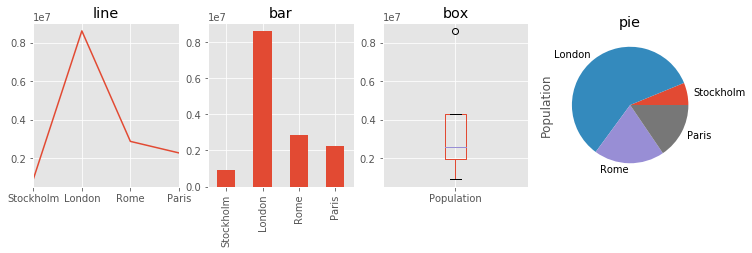

In [11]:
# pandas uses Matplotlib for plotting
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie');

#### DataFrame (p410)

In [12]:
# pass a nested Python list to the constructor of the DataFrame object
df = pd.DataFrame([
    [909976, "Sweden"],
    [8615246, "United Kingdom"],
    [2872086, "Italy"],
    [2273305, "France"]
])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [13]:
# 1) use labled indexing for rows by assigning a sequence of lables to the index attribute
# 2) set the columns attribute to a sequence of labels for the columns
df.index = ["Stockholm", "London", "Rome", "Paris"]
df.columns = ["Population", "State"]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [14]:
# index/column attributes can be set using the corresponding kwargs
# to the DataFrame when created
df = pd.DataFrame(
    [
        [909976, "Sweden"],
        [8615246, "United Kingdom"],
        [2872086, "Italy"],
        [2273305, "France"]
    ],
    index=["Stockholm", "London", "Rome", "Paris"],
    columns=["Population", "State"]
)
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [15]:
# pass a dictionary with column titles as keys and column data as values
df = pd.DataFrame(
    {
        "Population": [909976, 8615246, 2872086, 2273305],
        "State": ["Sweden", "United Kingdom", "Italy", "France"]
    },
    index=["Stockholm", "London", "Rome", "Paris"]
)
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [16]:
# access each column in a DataFrame using the column name
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [17]:
# access each column using the column name as attribute
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [18]:
# access rows of a Dataframe using the loc indexer
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [19]:
# passing a list of row labels to the loc indexer
# results in a new DataFrame that is a subset of the original
# Dataframe containing only the selectec rows
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [20]:
# loc indexer can be used to select rows and columns
# by first passing a row label and second a column label
df.loc[
    ["Paris", "Rome"],
    "Population"
]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [21]:
# the calculation is performed for each column 
# with numerical data types
df.mean()

Population    3667653.25
dtype: float64

In [22]:
# obtain a summary of the content in a DataFrame and
# the data types of each colujmn
df.info(), df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


(None, Population     int64
 State         object
 dtype: object)

In [23]:
# read in a dataset stored in a file
df_pop = pd.read_csv(
    "european_cities.csv",
    delimiter=",", 
    encoding="utf-8", 
    header=0
)

In [24]:
# inspect the summary given by the info method
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [25]:
# create a truncated dataset containing the first N rows
# equivalent to df[:n]
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London,United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [26]:
# use apply method to transform the content in a column
# which creates and returns a new Series object for which a function
# passed to apply has been applied to each element in the original
# column
df_pop["NumericalPopulation"] = df_pop.Population.apply(
    lambda x: int(x.replace(",", ""))
)

In [27]:
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [28]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [29]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericalPopulation
0,1,London,United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [30]:
# NumericalPopulation is of integer type
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericalPopulation         int64
dtype: object

In [31]:
# set_index method takes as argument the name of the column
# to use as index and returns a new DataFrame object and the
# original DataFrame is unchanged
df_pop2 = df_pop.set_index("City")

In [32]:
# sort_index sorts a DataFrame with respect to the index
df_pop2 = df_pop2.sort_index()

In [33]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericalPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [34]:
# sort_index method accepts a list of column names which creates
# a hierarchical index
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)
df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                
Austria  Vienna       7  1,794,770          1 January 2015   
Belgium  Antwerp     59    510,610          1 January 2014   
         Brussels    16  1,175,831          1 January 2014   
Bulgaria Plovdiv     84    341,041        31 December 2013   
         Sofia       14  1,291,895        14 December 2014   
         Varna       85    335,819        31 December 2013   
Croatia  Zagreb      24    790,017           31 March 2011   

                   NumericalPopulation  
State    City                           
Austria  Vienna                1794770  
Belgium  Antwerp                510610  
         Brussels              1175831  
Bulgaria Plovdiv                341041  
         Sofia                 1291895  
         Varna                  335819  
Croatia  Zagreb                 790017

In [35]:
# A DataFrame with a hierarchical index can be partially
# indexed using only its zeroth-level index
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericalPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [36]:
# A DataFrame can be indexed completely using a tuple of
# all hierarchical indices
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericalPopulation               528014
Name: (Sweden, Gothenburg), dtype: object

In [37]:
# sort by a column using sort_vslues method
df_pop.set_index("City").sort_values(
    ["State", "NumericalPopulation"], 
    ascending=[False, True])\
.head()

,Rank,State,Population,Date of census/estimate,NumericalPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [38]:
# count the number of cities each country has
city_counts = df_pop.State.value_counts()
city_counts.head()

Germany           19
United Kingdom    16
Spain             13
Italy             10
Poland            10
Name: State, dtype: int64

In [39]:
# create a hierarchical index and use the sum method to reduce
# the DataFrame along one of the indices
df_pop3 = df_pop[["State", "City", "NumericalPopulation"]].set_index(["State", "City"])
df_pop4 = df_pop3.sum(level="State").sort_values("NumericalPopulation", ascending=False)
df_pop4.head()

,NumericalPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [40]:
# use the groupby method to group rows of a DataFrame by the values
# of a given column and apply a reduction function on the resulting object
# which results in a new DataFrame with the grouped-by columns as index
df_pop5 = (df_pop.drop("Rank", axis=1)
    .groupby("State").sum()
    .sort_values("NumericalPopulation", ascending=False)
)
df_pop5.head()

,NumericalPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


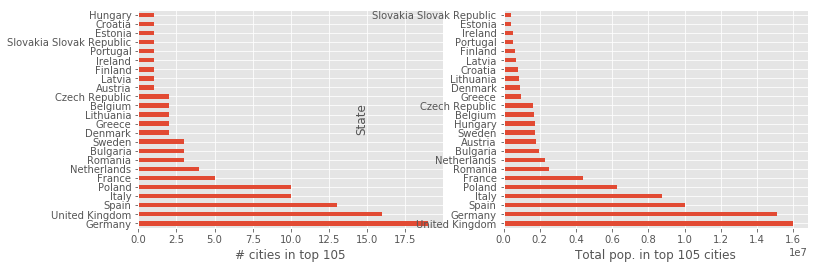

In [41]:
# use plot method of the Series object to plot bar graphs 
# for the city count and the total population
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericalPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities");

#### Time Series (p422)

In [42]:
# set the starting date and the number of elements
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [43]:
# specify the frequency of the timestamps and
# the ending points
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [44]:
# use DatetimeIndex as an index for a Series
ts1 = pd.Series(
    np.arange(31),
    index=pd.date_range("2015-1-1", periods=31)
)
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int64

In [45]:
# access the elements of a DatetimeIndex
# elements in a DatetimeIndex are Timestamp type
ts1["2015-1-3"], ts1.index[2]

(2, Timestamp('2015-01-03 00:00:00', freq='D'))

In [46]:
# retrieve year, month, day, hour, minute from Timestamp class
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [47]:
# Timestamp and datetime objects are interchangeable
ts1.index[2].nanosecond

0

In [48]:
# convert a Timestamp object to a standard Python datetime object
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [49]:
# create pandas series with a list of datetime objects
ts2 = pd.Series(
    np.random.rand(2),
    index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)]
)
ts2

2015-01-01    0.973917
2015-02-01    0.110180
dtype: float64

In [50]:
# construct an instance of the PeriodIndex by passing a 
# list of Period objects and specify it as an index
periods = pd.PeriodIndex([
    pd.Period('2015-01'),
    pd.Period('2015-02'),
    pd.Period('2015-03')
])
periods

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]', freq='M')

In [51]:
ts3 = pd.Series(np.random.rand(3), index=periods)
ts3

2015-01    0.595571
2015-02    0.330931
2015-03    0.995690
Freq: M, dtype: float64

In [52]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]', freq='M')

In [53]:
# convert a Series with DatetimeIndex to PeriodIndex
ts2.to_period('M')

2015-01    0.973917
2015-02    0.110180
Freq: M, dtype: float64

In [54]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [55]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [56]:
# convert the UNIX timestamps to date and time objects
df1.time = (pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time")

df2.time = (pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time")

In [57]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


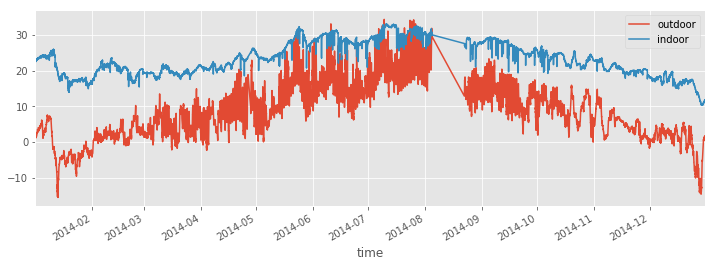

In [58]:
# plot two time series
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax);

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


In [60]:
# use a mask to select the desired elements
mask_jan = (df1.index >= '2014-1-1') & (df1.index < "2014-2-1")

In [61]:
df1_jan = df1[mask_jan]
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
outdoor    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


In [62]:
# slice directly with date and time strings
df2_jan = df2["2014-1-1":"2014-1-31"]
df2_jan.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


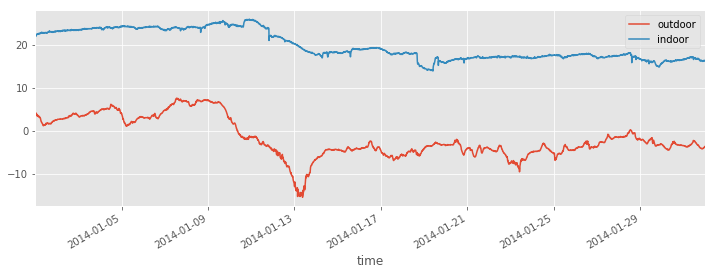

In [63]:
# plot two dataframes containing data only for the month of Jan
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax);

In [64]:
# convert the index to a column 
df1_month = df1.reset_index().head()

# apply function on the time column
df1_month["month"] = df1_month.time.apply(lambda x: x.month)
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


### The Seaborn Graphics Library (p434)